# CDIA20 | Projeto de Políticas Públicas de Saúde

## Coleta, tratamento, análise e visualização dos dados de despesas anuais da Prefeitura de Santos
Este projeto tem a finalidade de analisar, com base em conceitos de estatística e inflação, a despesa pública da cidade de Santos (janeiro de 2014 a outubro de 2020), com a meta de subsidiar políticas públicas de saúde, através de um modelo automatizado a ser desenvolvido

## Autores
#### Felipe Fernandes Rojas
#### Enzo Bressan Crivellaro


Alunos da Pontifícia Universidade Católica de São Paulo - PUC-SP

Curso: Ciência de Dados e Inteligência Artificial - 2º semestre


Disciplina: Projetos de Estatística sobre Bases de Dados Públicas

## Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

## Automatização função/função

In [2]:
# Realiza a leitura do arquivo
def coleta(endereço):
    df = pd.read_excel(endereço)
    return df

# Remove colunas desnecessárias
def remover_colunas_indesejadas(df):
    df = df.drop(['id_despesa_detalhe', 
                  'nr_empenho', 
                  'identificador_despesa', 
                  'cd_programa', 
                  'cd_acao'], axis = 1)
    return df

# Remove linhas desnecessárias
def remover_linhas_indesejadas(df):
    df = df[df['tp_despesa'] != 'Valor Liquidado']
    df = df[df['tp_despesa'] != 'Valor Pago']
    return df

# Cria a coluna que ajusta os valores de Anulação
def criar_coluna(df):
    if df['tp_despesa'] == 'Anulação':
        return df['vl_despesa'] * -1
    else:
        return df['vl_despesa']
    
# Insere uma coluna em um DataFrame com a despesa atualizada de acordo com a inflação
def inflacionar(df, inflação, nominal, ano_final):
    df['Despesa atualizada'] = df[nominal] * inflação['Número índice'].loc[ano_final] / inflação['Número índice']
    return df['Despesa atualizada']

# Soma as despesas em cada função do governo
def por_função(df):
    soma_por_função = df['despesa_real'].groupby(df['ds_funcao_governo']).sum()
    return soma_por_função

# Soma as despesas em subfunções de uma função específica do governo
def por_subfunção_específica(df, função):
    df = df.loc[df['ds_funcao_governo'] == função]
    soma_por_subfunção = df['despesa_real'].groupby(df['ds_subfuncao_governo']).sum()
    return soma_por_subfunção
    

## Coleta dos DataFrames

In [3]:
endereço_2014 = '../input/despesassantos2014a2020xlsx/despesas-santos-2014.xlsx'
endereço_2015 = '../input/despesassantos2014a2020xlsx/despesas-santos-2015.xlsx'
endereço_2016 = '../input/despesassantos2014a2020xlsx/despesas-santos-2016.xlsx'
endereço_2017 = '../input/despesassantos2014a2020xlsx/despesas-santos-2017.xlsx'
endereço_2018 = '../input/despesassantos2014a2020xlsx/despesas-santos-2018.xlsx'
endereço_2019 = '../input/despesassantos2014a2020xlsx/despesas-santos-2019.xlsx'
endereço_2020 = '../input/despesassantos2014a2020xlsx/despesas-santos-2020.xlsx'

In [4]:
df_2014 = coleta(endereço_2014)

In [5]:
df_2015 = coleta(endereço_2015)

In [6]:
df_2016 = coleta(endereço_2016)

In [7]:
df_2017 = coleta(endereço_2017)

In [8]:
df_2018 = coleta(endereço_2018)

In [9]:
df_2019 = coleta(endereço_2019)

In [10]:
df_2020 = coleta(endereço_2020)

## Tratamento dos DataFrames

In [11]:
# Aplicação dos métodos de tratamento
df_2014 = remover_colunas_indesejadas(df_2014)
df_2014 = remover_linhas_indesejadas(df_2014)
df_2014['despesa_real'] = df_2014.apply(criar_coluna, axis = 1)

In [12]:
df_2015 = remover_colunas_indesejadas(df_2015)
df_2015 = remover_linhas_indesejadas(df_2015)
df_2015['despesa_real'] = df_2015.apply(criar_coluna, axis = 1)

In [13]:
df_2016 = remover_colunas_indesejadas(df_2016)
df_2016 = remover_linhas_indesejadas(df_2016)
df_2016['despesa_real'] = df_2016.apply(criar_coluna, axis = 1)

In [14]:
df_2017 = remover_colunas_indesejadas(df_2017)
df_2017 = remover_linhas_indesejadas(df_2017)
df_2017['despesa_real'] = df_2017.apply(criar_coluna, axis = 1)

In [15]:
df_2018 = remover_colunas_indesejadas(df_2018)
df_2018 = remover_linhas_indesejadas(df_2018)
df_2018['despesa_real'] = df_2018.apply(criar_coluna, axis = 1)

In [16]:
df_2019 = remover_colunas_indesejadas(df_2019)
df_2019 = remover_linhas_indesejadas(df_2019)
df_2019['despesa_real'] = df_2019.apply(criar_coluna, axis = 1)

In [17]:
df_2020 = remover_colunas_indesejadas(df_2020)
df_2020 = remover_linhas_indesejadas(df_2020)
df_2020['despesa_real'] = df_2020.apply(criar_coluna, axis = 1)

## Análise dos dados

### Despesas atualizadas anualmente

In [18]:
# Lista dos anos analisados (servirá como índice de dataFrames)
lista_anos = []
ano_inicial = 2014
ano_final = 2019
for i in range(ano_inicial, ano_final + 1):
    lista_anos.append(i)
    
# 2020 possui dados até outubro
lista_anos.append('out/2020')    
    
lista_anos

[2014, 2015, 2016, 2017, 2018, 2019, 'out/2020']

In [19]:
# Lista das despesas totais de cada ano
dados = np.array([
    df_2014['despesa_real'].sum(),
    df_2015['despesa_real'].sum(),
    df_2016['despesa_real'].sum(),
    df_2017['despesa_real'].sum(),
    df_2018['despesa_real'].sum(),
    df_2019['despesa_real'].sum(),
    df_2020['despesa_real'].sum(),
])

In [20]:
# Valores de inflação coletados manualmente
igpdi = np.array([
    3.78, 10.68, 7.15, -0.42, 7.10, 7.68, 19
]) 
num_indice = np.array([
     100.00, 110.68, 118.60, 118.09, 126.48, 136.19, 162.07 
])

# Criação do DataFrame, adicionando os anos como índice
inflação = pd.DataFrame(igpdi, index = (lista_anos), columns = ['IGP-DI'])
inflação['Número índice'] = num_indice

inflação

,IGP-DI,Número índice
2014,3.78,100.00
2015,10.68,110.68
2016,7.15,118.60
2017,-0.42,118.09
2018,7.10,126.48
2019,7.68,136.19
out/2020,19.00,162.07


In [21]:
# DataFrame das despesas nominais e atualizadas [utilizando a função inflacionar()] segundo inflação IGP-DI
despesas_totais = pd.DataFrame(dados, index = (lista_anos), columns = ['Despesa nominal'])
inflacionar(despesas_totais, inflação, 'Despesa nominal', 'out/2020')

# FALTA REMOVER NOTAÇÃO CIENTÍFICA
despesas_totais

,Despesa nominal,Despesa atualizada
2014,2.145630e+09,3.477423e+09
2015,2.438438e+09,3.570632e+09
2016,2.455214e+09,3.355115e+09
2017,2.489831e+09,3.417113e+09
2018,2.627802e+09,3.367235e+09
2019,3.094259e+09,3.682256e+09
out/2020,2.992706e+09,2.992706e+09


In [22]:
# Estilo do gráfico
plt.style.use('seaborn-ticks')
# Tamanho do gráfico
plt.rcParams['figure.figsize'] = (11,7)

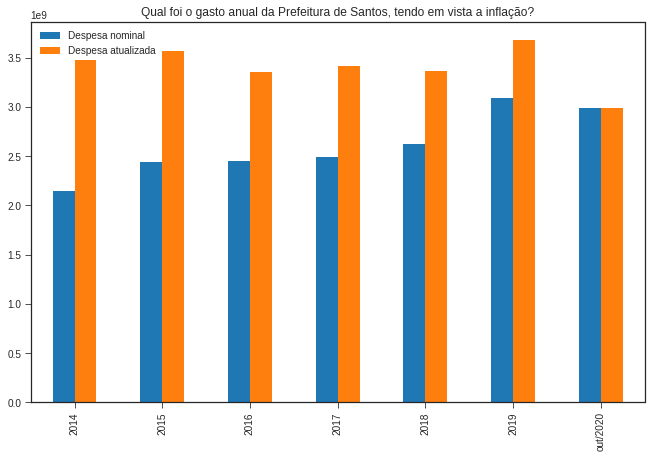

In [23]:
despesas_totais.plot(kind = 'bar',
                     title = 'Qual foi o gasto anual da Prefeitura de Santos, tendo em vista a inflação?')

### Despesas atualizadas por função do governo anualmente

In [24]:
# Lista com os gastos por função de cada ano
dados_1 = [por_função(df_2014), 
           por_função(df_2015), 
           por_função(df_2016), 
           por_função(df_2017), 
           por_função(df_2018), 
           por_função(df_2019), 
           por_função(df_2020)]

In [25]:
# Criando um DataFrame com as despesas totais das funções governamentais anualmente
funções_nominais = pd.DataFrame(dados_1, index = (lista_anos))

# Mostrando a estatística descritiva sobre o DataFrame acima
funções_nominais.describe()

ds_funcao_governo,ADMINISTRAÇÃO,ASSISTÊNCIA SOCIAL,CIÊNCIA E TECNOLOGIA,COMÉRCIO E SERVIÇOS,CULTURA,DESPORTO E LAZER,DIREITOS DA CIDADANIA,EDUCAÇÃO,ENCARGOS ESPECIAIS,GESTÃO AMBIENTAL,HABITAÇÃO,LEGISLATIVA,PREVIDÊNCIA SOCIAL,SANEAMENTO,SAÚDE,SEGURANÇA PÚBLICA,URBANISMO
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,4.567222e+08,6.104271e+07,1.469142e+06,6.876986e+06,2.873789e+07,1.870701e+07,5.370020e+06,5.664320e+08,6.766137e+07,1.871299e+07,3.071370e+07,5.544930e+07,3.379450e+08,9.865362e+06,5.692004e+08,2.223303e+07,3.491296e+08
std,1.316832e+08,9.491026e+06,7.239987e+05,4.932920e+06,1.277372e+07,9.883379e+06,3.597923e+06,5.802588e+07,1.852254e+07,7.495439e+06,1.521771e+07,6.403403e+06,7.208097e+07,1.658957e+07,9.919439e+07,1.705180e+07,7.030944e+07
min,3.108162e+08,5.044162e+07,1.034712e+06,1.177068e+06,1.059243e+07,7.374180e+06,1.308246e+06,4.800628e+08,4.945506e+07,7.985949e+06,1.641280e+07,4.336405e+07,2.418251e+08,2.410000e+04,4.345295e+08,3.753668e+06,2.293450e+08
25%,3.537188e+08,5.348455e+07,1.095661e+06,2.559449e+06,1.956531e+07,8.832410e+06,2.050980e+06,5.359697e+08,5.410722e+07,1.236636e+07,1.960007e+07,5.316350e+07,2.879079e+08,1.679000e+05,5.234236e+08,4.318581e+06,3.213182e+08
50%,3.946248e+08,5.794439e+07,1.156471e+06,7.773176e+06,2.792260e+07,2.275022e+07,5.259677e+06,5.525169e+08,6.058402e+07,2.361730e+07,2.244000e+07,5.743905e+07,3.313503e+08,1.488111e+06,5.357562e+08,3.284097e+07,3.358451e+08
75%,5.865546e+08,6.914800e+07,1.414120e+06,9.942305e+06,3.989352e+07,2.730245e+07,8.882524e+06,6.025353e+08,7.744304e+07,2.425469e+07,4.003138e+07,5.927694e+07,3.883928e+08,1.180844e+07,6.228421e+08,3.598660e+07,3.969306e+08
max,6.110674e+08,7.364789e+07,3.073250e+06,1.418515e+07,4.373254e+07,2.855492e+07,9.155210e+06,6.554339e+08,1.004900e+08,2.614560e+07,5.688020e+07,6.246114e+07,4.398384e+08,4.359265e+07,7.215856e+08,3.842620e+07,4.422191e+08


In [26]:
# Criando um DataFrame com as despesas nominais e atualizadas em Saúde, o foco do projeto
despesas_saúde = pd.DataFrame(funções_nominais['SAÚDE'])
inflacionar(despesas_saúde, inflação, 'SAÚDE', 'out/2020')
despesas_saúde = despesas_saúde.rename(columns={'SAÚDE': 'Despesa nominal'})

despesas_saúde

,Despesa nominal,Despesa atualizada
2014,4.345295e+08,7.042419e+08
2015,5.113314e+08,7.487484e+08
2016,5.357562e+08,7.321248e+08
2017,5.355158e+08,7.349567e+08
2018,5.666157e+08,7.260548e+08
2019,6.790684e+08,8.081108e+08
out/2020,7.215856e+08,7.215856e+08


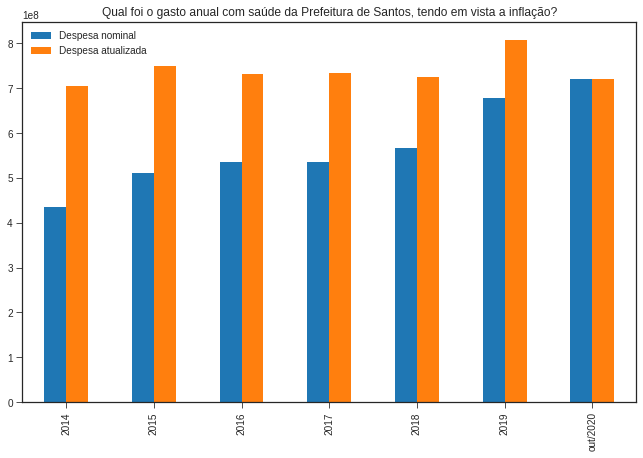

In [27]:
despesas_saúde.plot(kind = 'bar',
                    title = 'Qual foi o gasto anual com saúde da Prefeitura de Santos, tendo em vista a inflação?')

In [28]:
dados_2 = [por_subfunção_específica(df_2014, 'SAÚDE'),
           por_subfunção_específica(df_2015, 'SAÚDE'),
           por_subfunção_específica(df_2016, 'SAÚDE'),
           por_subfunção_específica(df_2017, 'SAÚDE'),
           por_subfunção_específica(df_2018, 'SAÚDE'),
           por_subfunção_específica(df_2019, 'SAÚDE'),
           por_subfunção_específica(df_2020, 'SAÚDE')]

In [29]:
subfunções_nominais = pd.DataFrame(dados_2, index = (lista_anos))
subfunções_nominais

ds_subfuncao_governo,ADMINISTRAÇÃO GERAL,ASSISTÊNCIA HOSPITALAR E AMBULATORIAL,ATENÇÃO BÁSICA,SUPORTE PROFILÁTICO E TERAPÊUTICO,VIGILÂNCIA EPIDEMIOLÓGICA,VIGILÂNCIA SANITÁRIA
2014,41308284.03,2.854033e+08,7.567167e+07,9038199.24,23004354.88,103653.95
2015,41959608.84,3.322066e+08,1.023938e+08,8417617.33,26277276.83,76489.68
2016,41913847.21,3.626659e+08,9.353615e+07,10141236.10,27352620.05,146429.68
2017,42129248.12,3.687474e+08,8.942390e+07,8612131.56,26547810.96,55274.89
2018,42343470.98,4.020712e+08,8.863090e+07,6719697.20,26685718.66,164726.27
2019,71075750.99,4.611625e+08,1.105544e+08,7394548.86,28707583.69,173591.79
out/2020,66486959.96,5.176339e+08,1.040910e+08,4832669.59,28498691.83,42338.25


In [30]:
# Estilo do gráfico
plt.style.use('bmh')
# Tamanho do gráfico
plt.rcParams['figure.figsize'] = (11,8)

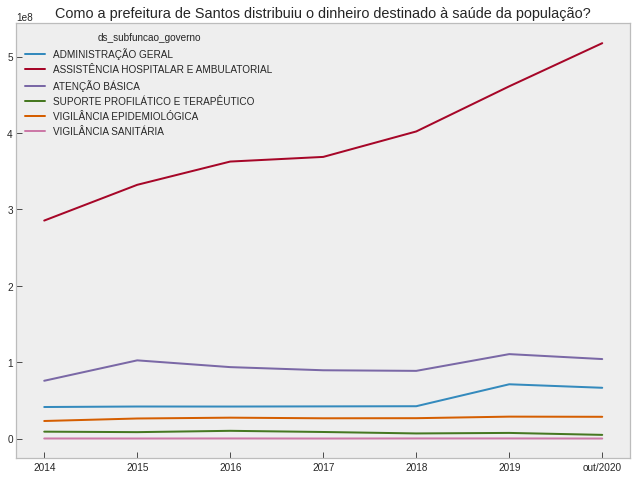

In [31]:
subfunções_nominais.plot(grid = False, 
                         title = 'Como a prefeitura de Santos distribuiu o dinheiro destinado à saúde da população?')

In [32]:
assistencia = pd.DataFrame(subfunções_nominais['ASSISTÊNCIA HOSPITALAR E AMBULATORIAL'])
inflacionar(assistencia, inflação, 'ASSISTÊNCIA HOSPITALAR E AMBULATORIAL', 'out/2020')

2014        4.625532e+08
2015        4.864539e+08
2016        4.955924e+08
2017        5.060792e+08
2018        5.152094e+08
2019        5.487966e+08
out/2020    5.176339e+08
Name: Despesa atualizada, dtype: float64

In [33]:
# Estilo do gráfico
plt.style.use('bmh')
# Tamanho do gráfico
plt.rcParams['figure.figsize'] = (11,5)

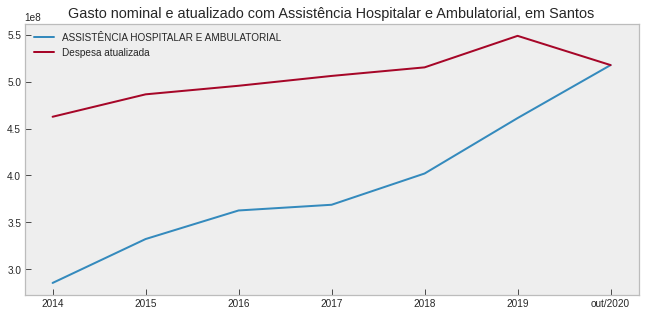

In [34]:
assistencia.plot(grid = False, 
                 title = 'Gasto nominal e atualizado com Assistência Hospitalar e Ambulatorial, em Santos')

In [35]:
administração = pd.DataFrame(subfunções_nominais['ADMINISTRAÇÃO GERAL'])
inflacionar(administração, inflação, 'ADMINISTRAÇÃO GERAL', 'out/2020')

2014        6.694834e+07
2015        6.144194e+07
2016        5.727637e+07
2017        5.781935e+07
2018        5.425843e+07
2019        8.458218e+07
out/2020    6.648696e+07
Name: Despesa atualizada, dtype: float64

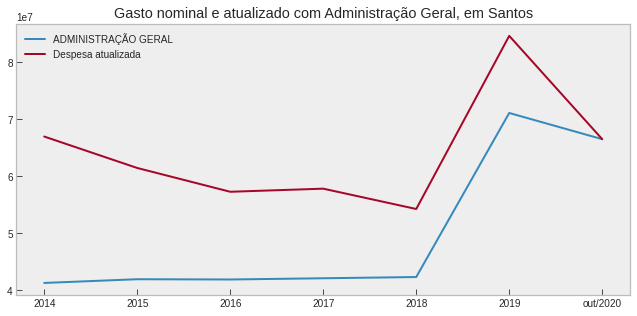

In [36]:
administração.plot(grid = False, 
                   title = 'Gasto nominal e atualizado com Administração Geral, em Santos')

## Mapeamento dos estabelecimentos de saúde da cidade

In [37]:
# Leitura do DataFrame das UBS's de Santos
df_ubs = pd.read_excel('../input/ubs-e-caps-em-santos-30/ubs_funcionamentonone_santos3.xlsx')
df_ubs.head()

,lat,long,no_fantasia,no_logradouro,cidade,LAT_Real,(Ignore),LONG_Real,(Ignore)2
0,-239307332038872,-463442587852465,UNIDADE DE SAUDE DA FAMILIA DO VALONGO,RUA PROFESSORA MARIA NEUSA CUNHA,Santos,-23.930733,13,-46.344259,13
1,-23937493,-463578944,UNIDADE DE SAUDE DA FAMILIA MORRO SANTA MARIA,RUA UM,Santos,-23.937493,6,-46.357894,7
2,-239549052715295,-46343636512755,SEUB DE SAUDE DO CAMPO GRANDE,RUA DOUTOR CARVALHO MENDONCA,Santos,-23.954905,13,-46.343637,12
3,-239755690097802,-463100123405443,SEUB DE SAUDE DA APARECIDA,AV PEDRO LESSA,Santos,-23.975569,13,-46.310012,13
4,-239428889751427,-463467907905565,USF E PRONTO ATENDIMENTO DA NOVA CINTRA,RUA JOSE OZEAS BARBOSA,Santos,-23.942889,13,-46.346791,13


In [38]:
# Leitura do DataFrame de CAPS's de Santos
df_caps = pd.read_excel('../input/ubs-e-caps-em-santos-30/CAPS_Santos3.xlsx')
df_caps.head()

,municipio,estabelecimento,endereco,latitude,Longitude,LAT_Real,(Ignore),LONG_Real,(Ignore)2
0,Santos,CENTRO ATENCAO PSICOSSOCIAL ALCOOL E DROGAS ZO...,"RUA SILVA JARDIM, 354 Bairro: MACUCO CEP: 1101...",-23954121,-46319972,-23.954121,6,-46.319972,6
1,Santos,CENTRO DE ATENCAO PSICOSSOCIAL PRAIA CAPS PRAIA,"AVENIDA CORONEL JOAQUIM MONTENEGRO, 329 Bairro...",-23979073,-46303339,-23.979073,6,-46.303339,6
2,Santos,CAPS ORQUIDARIO,"AVENIDA GENERAL FRANCISCO GLICERIO, 661 Bairro...",-23965279,-46347906,-23.965279,6,-46.347906,6
3,Santos,CAPS CENTRO,"AVENIDA CONSELHEIRO RODRIGUES ALVES, 236 Bairr...",-23955938,-4631651,-23.955938,6,-46.316510,5
4,Santos,CENTRO DE ATENCAO PSICOSSOCIAL ZONA NOROESTE C...,"RUA COMANDANTE BULCAO VIANA, 853 Bairro: BOM R...",-23940752,-46375768,-23.940752,6,-46.375768,6


In [39]:
# Definição das listas de Latitude e Longitude dos estabelecimentos
latitude = df_ubs['LAT_Real']
latitude.append(df_caps['LAT_Real'])
longitude = df_ubs['LONG_Real']
longitude.append(df_caps['LONG_Real'])

0    -46.344259
1    -46.357894
2    -46.343637
3    -46.310012
4    -46.346791
5    -46.340697
6    -46.358464
7    -46.332285
8    -46.357541
9    -46.373441
10   -46.330230
11   -46.334000
12   -46.331371
13   -46.352928
14   -46.387904
15   -46.331371
16   -46.380243
17   -46.349816
18   -46.331371
19   -46.334000
20   -46.300657
21   -46.316342
22   -46.382282
23   -46.322865
24   -46.339688
25   -46.334000
26   -46.366403
27   -46.341813
28   -46.370480
29   -46.335140
30   -46.334000
0    -46.319972
1    -46.303339
2    -46.347906
3    -46.316510
4    -46.375768
5    -46.345096
Name: LONG_Real, dtype: float64

In [40]:
# Criando o mapa com zoom em Santos
mapa_santos = folium.Map(location=[-23.9549113,-46.3796944], 
                  zoom_start=13)

In [41]:
# Iteração que adiciona as latitudes e longitudes dos estabelecimentos ao mapa
for lat, lon in zip(latitude, longitude):
    folium.Marker(location=[float(lat), float(lon)]).add_to(mapa_santos)

In [42]:
mapa_santos

### Comentário do mapa
Observa-se uma centralização na localização dos estabelecimentos, em que o extremo sudeste possui somente duas UBS's

## Análise da Cobertura de Atenção Básica de AGO/19 a JUL/20

In [43]:
# Leitura do DataFrame da Cobertura de Santos
df_cobertura = pd.read_excel('../input/coberturaabsantosago2019jul2020/Cobertura-AB-SUDESTE - SP - SANTOS-Agosto de 2019  Julho de 2020..xlsx')
df_cobertura

,Competência,Macrorregião,UF,IBGE,Município,População,Nº ESF Cob.,Nº EAB Param. Cob.,CH Médico,CH Enfermeiro,Nº eSF equivalente,Estim. Pop. Cob. ESF,Cobertura ESF,Estim. Pop. Cob. AB,Cobertura AB
0,2019-08-01,SUDESTE,SP,354850,SANTOS,432957,32,8,34.00,29.50,30,110400,0.2550,222900,0.5148
1,2019-09-01,SUDESTE,SP,354850,SANTOS,432957,34,8,32.16,24.50,25,117300,0.2709,214800,0.4961
2,2019-10-01,SUDESTE,SP,354850,SANTOS,432957,34,8,32.50,24.50,25,117300,0.2709,214800,0.4961
3,2019-11-01,SUDESTE,SP,354850,SANTOS,432957,33,7,32.50,23.50,24,113850,0.2630,205350,0.4743
4,2019-12-01,SUDESTE,SP,354850,SANTOS,432957,35,7,33.06,19.75,20,120750,0.2789,201000,0.4642
5,2020-01-01,SUDESTE,SP,354850,SANTOS,433311,37,7,33.73,19.92,20,127650,0.2946,208410,0.4810
6,2020-02-01,SUDESTE,SP,354850,SANTOS,433311,37,7,33.90,18.75,19,127650,0.2946,204900,0.4729
7,2020-03-01,SUDESTE,SP,354850,SANTOS,433311,35,7,33.53,18.75,19,120750,0.2787,198000,0.4569
8,2020-04-01,SUDESTE,SP,354850,SANTOS,433311,36,7,34.01,20.00,20,124200,0.2866,205200,0.4736
9,2020-05-01,SUDESTE,SP,354850,SANTOS,433311,35,7,35.31,22.25,22,120750,0.2787,208500,0.4812


### Gráficos

In [44]:
# Estilo do gráfico
plt.style.use('seaborn-ticks')
# Tamanho do gráfico
plt.rcParams['figure.figsize'] = (8,5)

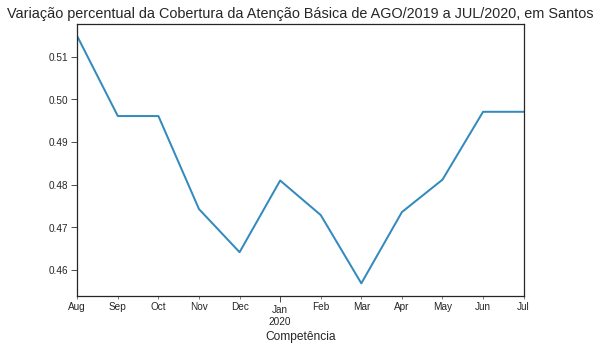

In [45]:
# Variação da população coberta percentualmente
df_cobertura.plot(kind = 'line',
                  x = 'Competência',
                  y = 'Cobertura AB',
                  legend = False,
                  title = 'Variação percentual da Cobertura da Atenção Básica de AGO/2019 a JUL/2020, em Santos')

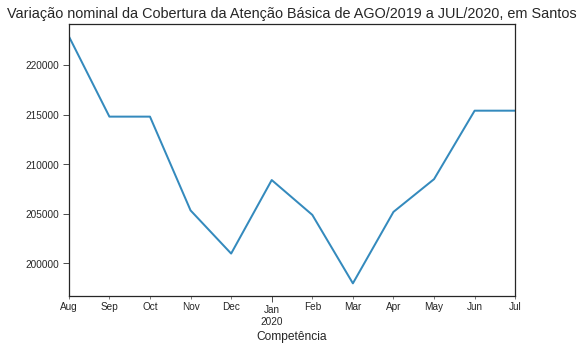

In [46]:
# Variação da população coberta nominalmente
df_cobertura.plot(kind = 'line',
                  x = 'Competência',
                  y = 'Estim. Pop. Cob. AB',
                  legend = False,
                  title = 'Variação nominal da Cobertura da Atenção Básica de AGO/2019 a JUL/2020, em Santos')

### Comentários dos gráficos de variação da Cobertura da Atenção Básica, acima
Nos gráficos acima, da variação do índice de Cobertura da Atenção Básica em Santos, percebemos o mesmo desenho (obviamente, pois o primeiro é uma taxa gerada a partir da variação nominal) e uma queda de mais de 20 mil pessoas no número absoluto, de Agosto a Março, agora normalizado em 215 mil (queda de 5 mil, se comparado diretamente a um ano atrás). A variação percentual parece trazer escala enganosa, por ter amplitude de variação de somente 5% e isso representar todo o comprimento do gráfico, mas se trata de 20 mil habitantes praianos.

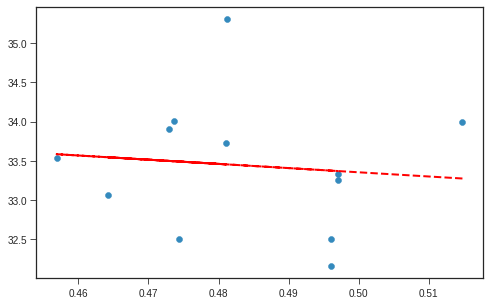

In [47]:
# Cobertura AB vs. CH Médico
x = df_cobertura['Cobertura AB']
y = df_cobertura['CH Médico']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.show()

### Comentários sobre Cobertura AB vs. CH Médico
Parece não haver correlação entre carga horária de médicos e Cobertura da Atenção Básica em Santos, no período indicado

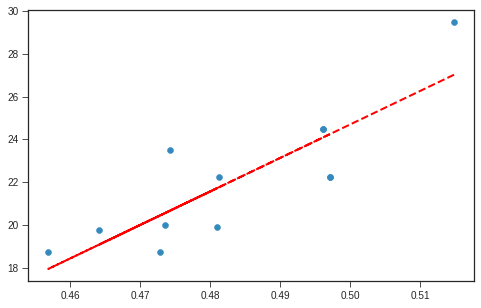

In [48]:
# Cobertura AB vs. CH Enfermeiro
x = df_cobertura['Cobertura AB']
y = df_cobertura['CH Enfermeiro']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.show()

### Comentários sobre Cobertura AB vs. CH Enfermeiro
Parece haver correlação positiva entre carga horária de enfermeiros e Cobertura da Atenção Básica em Santos, no período indicado

## Dados epidemiológicos

In [49]:
df_morbidade = pd.read_excel('../input/morbidade-hospitalar-do-sus-santos/morbidade.xlsx')
df_morbidade.loc[df_morbidade['Ano atendimento'] == 2020]

,Ano atendimento,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_-_compl_federal,Val_serv_hosp_-_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_-_compl_federal,Val_serv_prof_-_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade
5,2020,1177,1182,3040681.38,2539922.49,-,-,500758.89,-,-,2572.49,2583.42,8141,6.9,81,6.88
